In [52]:
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:

data = pd.read_csv(r'C:\Users\Youcode\Desktop\avito_analyse\data\appartements_data.csv')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1062 non-null   object 
 1   price          930 non-null    object 
 2   location       1062 non-null   object 
 3   type_de_vente  386 non-null    object 
 4   salon          640 non-null    float64
 5   chamber        339 non-null    float64
 6   toilete        336 non-null    float64
 7   area           693 non-null    float64
 8   link           1063 non-null   object 
dtypes: float64(4), object(5)
memory usage: 74.9+ KB


In [55]:
df = data.copy()
df.head(4)

,title,price,location,type_de_vente,salon,chamber,toilete,area,link
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,NaN,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
1,appartement à louer,2 400 DH,Casablanca,NaN,1.0,NaN,NaN,50.0,https://www.avito.ma/fr/al_qods/appartements/a...
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,NaN,1.0,NaN,NaN,150.0,https://www.avito.ma/fr/autre_secteur/appartem...
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,NaN,1.0,NaN,NaN,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...


In [68]:
import numpy as np
def replace_nan_louer(x):
    if pd.isna(x):
        x='a louer'
    return x


In [69]:
df['type_de_vente'] = df['type_de_vente'].apply(replace_nan_louer)

In [70]:
df.head()

,title,price,location,type_de_vente,salon,chamber,toilete,area,link
0,Appartement location de vacances à Meknès,300 DH /Nuit,Meknès,a louer,NaN,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
1,appartement à louer,2 400 DH,Casablanca,a louer,1.0,NaN,NaN,50.0,https://www.avito.ma/fr/al_qods/appartements/a...
2,Appartement beru à louer 150 m² à Temara,6 500 DH,Temara,a louer,1.0,NaN,NaN,150.0,https://www.avito.ma/fr/autre_secteur/appartem...
3,Appartement près a casanearshor sidi maarouf,3 000 DH,Casablanca,a louer,1.0,NaN,NaN,56.0,https://www.avito.ma/fr/sidi_maarouf/apparteme...
4,Appartement 84 m²Al Baraka à Dcheïra El Jihadia,701 720 DH,Dcheïra El Jihadia,"Appartements, à vendre",1.0,3.0,2.0,84.0,https://www.avito.ma/fr/dche%C3%AFra_el_jihadi...


In [71]:
def changer_louer_vendre(x):
    if x=='a louer':
        return x
    else:
        return 'a vendre'

In [72]:
df['type_de_vente'] = df['type_de_vente'].apply(changer_louer_vendre)

In [7]:
df.describe()

,salon,chamber,toilete,area
count,640.000000,339.000000,336.000000,693.000000
mean,1.223437,2.368732,2.401786,97.308802
std,0.452862,0.668188,7.893840,40.543845
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,70.000000
50%,1.000000,2.000000,2.000000,90.000000
75%,1.000000,3.000000,2.000000,115.000000
max,3.000000,6.000000,100.000000,500.000000


In [74]:
#convertir price en float apres la suppresion de DH

df['new_price'] = df['price'].str.replace("DH","")


In [75]:
df['new_price'] = df['new_price'].str.replace("/Nuit","")


In [76]:
df['price'].unique()

array(['300 DH /Nuit', '2\u202f400 DH', '6\u202f500 DH', '3\u202f000 DH',
       '701\u202f720 DH', '580\u202f000 DH', '6\u202f800 DH',
       '760\u202f000 DH', nan, '1\u202f560\u202f000 DH',
       '1\u202f100\u202f000 DH', '1\u202f300\u202f000 DH',
       '1\u202f277\u202f500 DH', '880\u202f000 DH', '2\u202f600 DH',
       '4\u202f500 DH', '3\u202f900 DH', '562\u202f500 DH',
       '1\u202f238\u202f400 DH', '3\u202f200 DH', '864\u202f000 DH',
       '860\u202f000 DH', '1\u202f400\u202f000 DH', '10\u202f500 DH',
       '500 DH /Nuit', '8\u202f000 DH', '4\u202f200 DH', '470 DH /Nuit',
       '9\u202f500 DH', '250 DH /Nuit', '200 DH /Nuit', '15\u202f500 DH',
       '650\u202f000 DH', '315 DH /Nuit', '1\u202f650\u202f000 DH',
       '5\u202f000 DH', '11\u202f000 DH', '980\u202f000 DH',
       '5\u202f500 DH', '370\u202f000 DH', '2\u202f300 DH',
       '480\u202f000 DH', '300 DH', '590 DH /Nuit', '12\u202f000 DH',
       '1\u202f550\u202f000 DH', '10\u202f000 DH', '199 DH /Nuit',
       

In [77]:
def nettoyer_prix(prix):
    if isinstance(prix, str):  
        
        prix = prix.replace('\u202f', '').replace(' ', '')
        return float(prix) if prix else None 
    return None  

# Appliquer la fonction à la colonne 

In [78]:
df['new_price'] = df['new_price'].apply(nettoyer_prix)

In [79]:
df['new_price'].isna().sum()

133

In [80]:
df.columns

Index(['title', 'price', 'location', 'type_de_vente', 'salon', 'chamber',
       'toilete', 'area', 'link', 'new_price'],
      dtype='object')

In [81]:
df['location'].unique()

array(['Meknès', 'Casablanca', 'Temara', 'Dcheïra El Jihadia',
       'Mohammedia', 'Agadir', 'الدار البيضاء', 'Béni Yakhlef',
       'El Jadida', 'Dakhla', 'Rabat', 'Marrakech', 'Tanger', 'مراكش',
       'Kénitra', 'فاس', 'Fès', 'Bouskoura', 'Essaouira', 'Settat',
       'Mehdia', 'Dar Bouazza', 'Martil', 'Nouaceur', 'Inzegan', 'Asilah',
       'Had Soualem', 'Oujda', 'Saidia', 'تمارة', 'Nador', 'Benslimane',
       'Salé', 'Sidi Bouknadel', 'Ait Melloul', 'Tamesna', 'Taza',
       'القنيطرة', 'Tétouan', 'Tamaris', 'Selouane', 'Bouznika', 'أكادير',
       'El Mansouria', 'Skhirat', 'Béni Mellal', 'Cabo Negro', 'Ifrane',
       'Errahma', 'Taghazout', 'Safi', 'Al Hoceima', 'Errachidia',
       'Zenata', 'Ben Guerir', 'Sidi Rahal', 'Mediouna', nan,
       'Chefchaouen', 'Merzouga', 'Mdiq'], dtype=object)

In [82]:
mapping_villes = {
    "الدار البيضاء": "Casablanca",
    "مراكش": "Marrakech",
    "فاس": "Fès",
    "تمارة": "Temara",
    "أكادير": "Agadir",
    "القنيطرة": "Kénitra",
    
}

In [83]:
def changer_nom_ville(ville):
    return mapping_villes.get(ville,ville)

df['location'] = df['location'].apply(changer_nom_ville)

In [84]:
df['location'].unique()

array(['Meknès', 'Casablanca', 'Temara', 'Dcheïra El Jihadia',
       'Mohammedia', 'Agadir', 'Béni Yakhlef', 'El Jadida', 'Dakhla',
       'Rabat', 'Marrakech', 'Tanger', 'Kénitra', 'Fès', 'Bouskoura',
       'Essaouira', 'Settat', 'Mehdia', 'Dar Bouazza', 'Martil',
       'Nouaceur', 'Inzegan', 'Asilah', 'Had Soualem', 'Oujda', 'Saidia',
       'Nador', 'Benslimane', 'Salé', 'Sidi Bouknadel', 'Ait Melloul',
       'Tamesna', 'Taza', 'Tétouan', 'Tamaris', 'Selouane', 'Bouznika',
       'El Mansouria', 'Skhirat', 'Béni Mellal', 'Cabo Negro', 'Ifrane',
       'Errahma', 'Taghazout', 'Safi', 'Al Hoceima', 'Errachidia',
       'Zenata', 'Ben Guerir', 'Sidi Rahal', 'Mediouna', nan,
       'Chefchaouen', 'Merzouga', 'Mdiq'], dtype=object)

In [85]:
#nombre total des villes 
df['location'].value_counts()

location
Casablanca            311
Marrakech             112
Tanger                 94
Rabat                  93
Agadir                 91
Temara                 50
Fès                    42
El Jadida              30
Kénitra                30
Mohammedia             28
Martil                 22
Salé                   17
Bouskoura              14
Meknès                 13
Bouznika               12
Essaouira              11
El Mansouria            7
Oujda                   7
Dar Bouazza             6
Taghazout               6
Had Soualem             6
Saidia                  5
Tétouan                 4
Asilah                  4
Nador                   4
Al Hoceima              3
Taza                    3
Ifrane                  3
Béni Yakhlef            3
Ait Melloul             2
Errachidia              2
Nouaceur                2
Sidi Rahal              2
Tamaris                 2
Skhirat                 2
Errahma                 1
Zenata                  1
Mediouna                1
Che

In [86]:
df['area'].isna().sum()

370

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salon,640.0,1.223437,4.528616e-01,0.0,1.0,1.0,1.0,3.0
chamber,339.0,2.368732,6.681879e-01,1.0,2.0,2.0,3.0,6.0
toilete,336.0,2.401786,7.893840e+00,0.0,1.0,2.0,2.0,100.0
area,693.0,97.308802,4.054384e+01,1.0,70.0,90.0,115.0,500.0
new_price,930.0,490812.322581,1.399311e+06,150.0,500.0,7000.0,700000.0,28000000.0


In [88]:
df_louer = df[df['type_de_vente']=='a louer']
df_vendre = df[df['type_de_vente']=='a vendre']

In [92]:
print(df_louer.shape)
print(df_vendre.shape)

(677, 10)
(386, 10)


In [93]:
def analyse_statistique_et_asymetire(dataframe,colone):
    mean = dataframe[colone].mean()
    median = dataframe[colone].median()
    std_dev = dataframe[colone].std()


    print(f'statistiques descriptive pour la colone {colone} est')
    print(mean)
    print(median)
    print(std_dev)

    difference = abs(mean - median)
    print(f'la difference absolue entre la moyenne et la median : {difference}')

    if difference> std_dev*0.5:
        print('distribution potentiellement asymetrique (différence significative)')
    else:
        print('distribution probablement symetrique (difference faible)')

    plt.figure(figsize=(10,6))
    sns.histplot(dataframe[colone],kde=True,color='skyblue',bins=30)
    plt.axvline(mean,color='red',label=f'moyenne({mean})')
    plt.axvline(median,color='green',label=f'mediane({median})')
    plt.title(f"distribution de {colone}")
    plt.xlabel(colone)
    plt.ylabel('frequence')
    plt.legend()
    plt.show()




statistiques descriptive pour la colone salon est
1.2269736842105263
1.0
0.4643701713836386
la difference absolue entre la moyenne et la median : 0.22697368421052633
distribution probablement symetrique (difference faible)


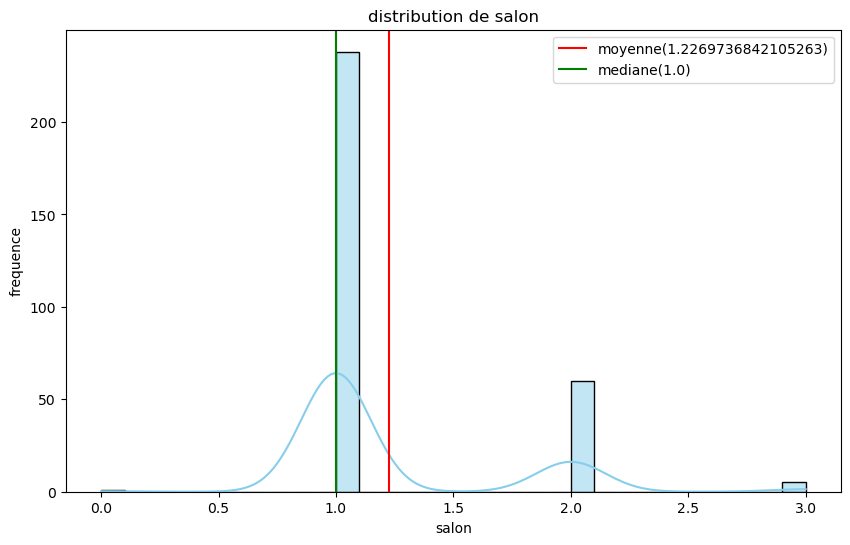

In [94]:
analyse_statistique_et_asymetire(df_louer,'salon')

In [50]:
df.columns

Index(['title', 'price', 'location', 'type_de_vente', 'salon', 'chamber',
       'toilete', 'area', 'link', 'new_price'],
      dtype='object')

statistiques descriptive pour la colone area est
100.61488673139158
90.0
45.639580805560186
la difference absolue entre la moyenne et la median : 10.614886731391579
distribution probablement symetrique (difference faible)


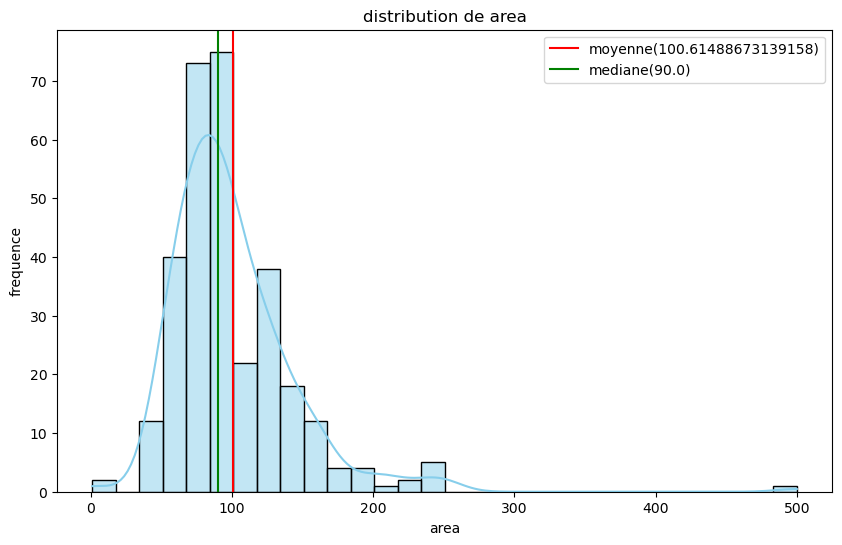

In [95]:
analyse_statistique_et_asymetire(df_louer,'area')

statistiques descriptive pour la colone chamber est
2.6
1.0
2.302172886644268
la difference absolue entre la moyenne et la median : 1.6
distribution potentiellement asymetrique (différence significative)


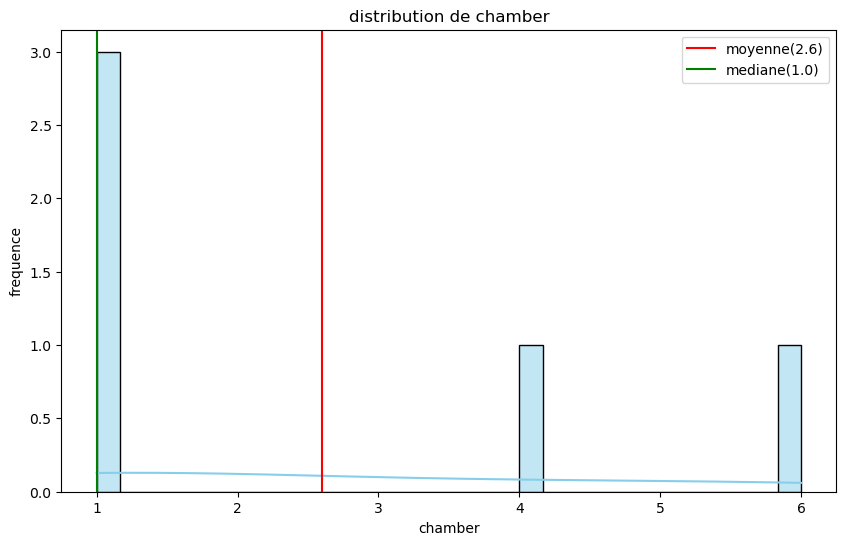

In [96]:
analyse_statistique_et_asymetire(df_louer,'chamber')

statistiques descriptive pour la colone salon est
1.2269736842105263
1.0
0.4643701713836386
la difference absolue entre la moyenne et la median : 0.22697368421052633
distribution probablement symetrique (difference faible)


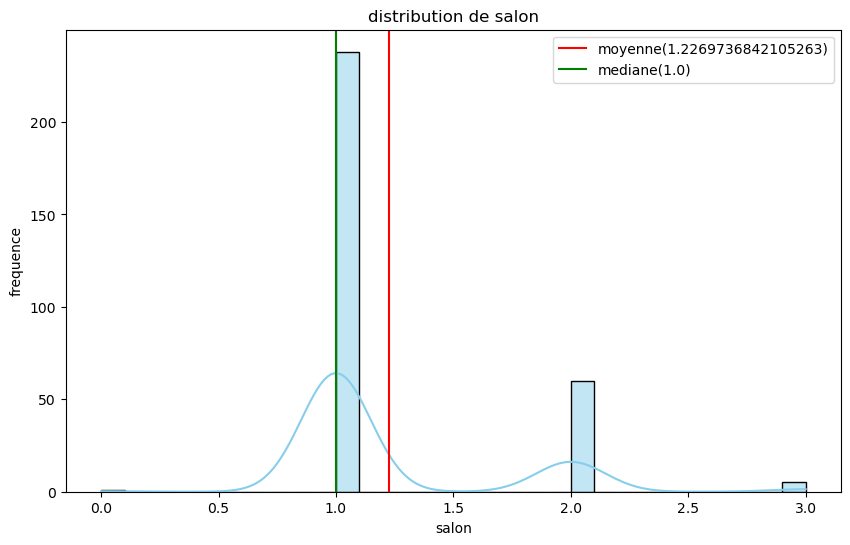

In [97]:
analyse_statistique_et_asymetire(df_louer,'salon')

statistiques descriptive pour la colone new_price est
35010.18456375839
2375.0
287379.15337062924
la difference absolue entre la moyenne et la median : 32635.18456375839
distribution probablement symetrique (difference faible)


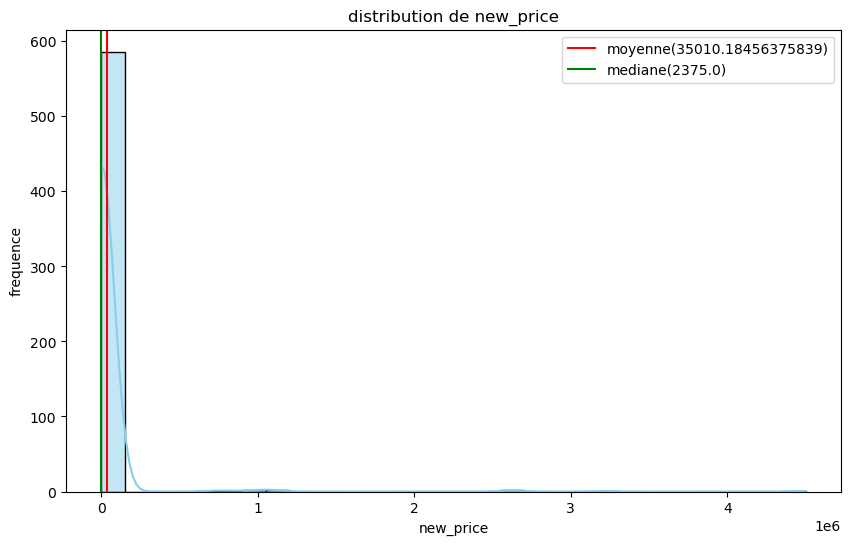

In [98]:
analyse_statistique_et_asymetire(df_louer,'new_price')